<a href="https://colab.research.google.com/github/Afififaiz/Day2-AiNusantara/blob/main/Day2_AiNusantara_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Hyperparameters
input_size = 784  # 28x28 images flattened
hidden_size = 800 #
output_size = 10  # number of classes (digits 0-9)
learning_rate = 0.0001
batch_size = 64
epochs = 10

In [52]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


In [53]:
# Visualize some training data
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.show()

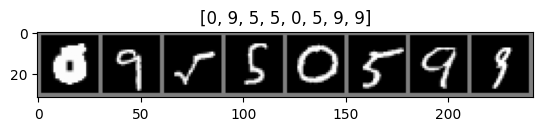

In [54]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8], nrow=8), title=[labels[j].item() for j in range(8)])

In [55]:
# Define the neural network
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [56]:
# Instantiate the model, define loss function and optimizer
model = SimpleMLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
# Training the model
train_losses = []
test_accuracies = []

In [58]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}')

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Test Accuracy: {accuracy:.2f}%')

Epoch [1/10], Loss: 0.5094
Test Accuracy: 91.96%
Epoch [2/10], Loss: 0.2605
Test Accuracy: 93.93%
Epoch [3/10], Loss: 0.1967
Test Accuracy: 94.99%
Epoch [4/10], Loss: 0.1572
Test Accuracy: 95.74%
Epoch [5/10], Loss: 0.1302
Test Accuracy: 96.30%
Epoch [6/10], Loss: 0.1106
Test Accuracy: 96.83%
Epoch [7/10], Loss: 0.0952
Test Accuracy: 97.13%
Epoch [8/10], Loss: 0.0838
Test Accuracy: 97.14%
Epoch [9/10], Loss: 0.0742
Test Accuracy: 97.41%
Epoch [10/10], Loss: 0.0660
Test Accuracy: 97.44%


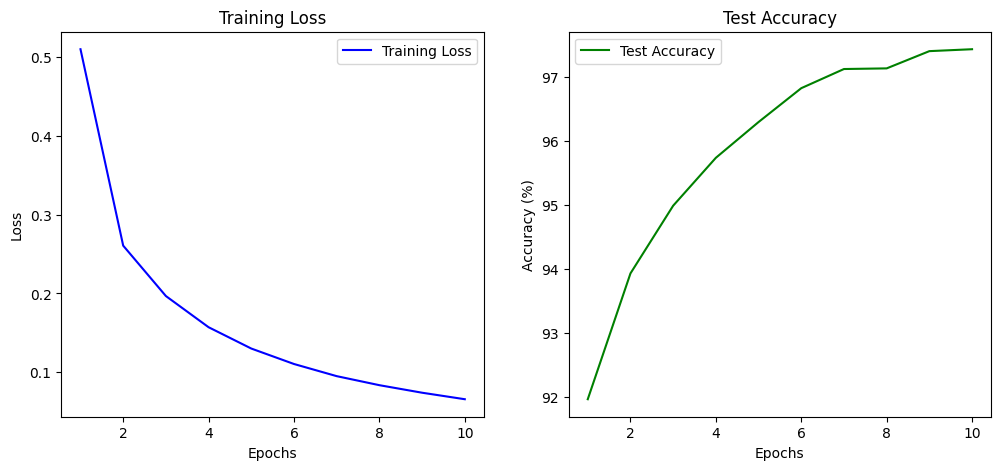

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, 'g', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

In [60]:
# Visualize some test data with predictions
dataiter = iter(test_loader)


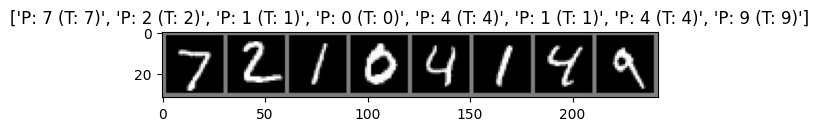

In [61]:
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images[:8], nrow=8), title=[f'P: {predicted[j].item()} (T: {labels[j].item()})' for j in range(8)])

In [62]:
torch.save(model.state_dict(), 'mnist_model_trained.pth')

In [63]:
for p in model.parameters():
  print(p)

Parameter containing:
tensor([[ 0.0231, -0.0245, -0.0073,  ..., -0.0277,  0.0263,  0.0138],
        [-0.0088,  0.0297,  0.0077,  ...,  0.0057,  0.0298,  0.0074],
        [ 0.0119,  0.0267, -0.0220,  ..., -0.0228, -0.0239, -0.0292],
        ...,
        [ 0.0092, -0.0339,  0.0372,  ..., -0.0208,  0.0090,  0.0326],
        [ 0.0337, -0.0108,  0.0111,  ...,  0.0313,  0.0166,  0.0136],
        [ 0.0209, -0.0063,  0.0127,  ...,  0.0093,  0.0203, -0.0356]],
       requires_grad=True)
Parameter containing:
tensor([-2.3439e-02,  2.0061e-02,  3.9981e-03, -2.8605e-02,  4.6462e-04,
         1.0348e-02, -2.3238e-03, -1.2026e-02, -3.0198e-02, -2.4422e-02,
        -1.3462e-02, -3.0995e-02,  1.6410e-02, -1.6959e-02, -2.6421e-02,
         4.1948e-03, -1.8382e-02, -1.0764e-02,  2.6562e-02,  3.2509e-02,
         2.2966e-03, -2.9683e-02, -3.4958e-02,  1.7109e-02,  2.0360e-03,
         1.4639e-02, -1.9623e-02,  1.0044e-02, -1.1639e-02,  1.4140e-02,
        -1.6187e-03,  3.2067e-02, -2.6331e-02,  8.9790e-0